# Brand Sales AdSpend Data

## Project Overview
This project investigates the relationship between advertising expenditure and sales performance across multiple brands and countries. By leveraging marketing analytics, we aim to uncover ROI patterns, optimize ad budgeting, and drive strategic decisions.

---

## Key Objectives
- Understand Ad Efficiency: Examine how ad spend impacts gross, net, and total sales
- Visualize Performance: Analyze trends across brands, countries, and time
- Sales Drivers: Identify high-return combinations of region, brand, and ad spend
- Detect Outliers: Spot anomalies in returns, negative sales, or low-yield campaigns

---

## Dataset Features

| Variable         | Description                            |
|------------------|----------------------------------------|
| Date           | Transaction date                       |
| Brand Name     | Brand label (e.g., Brand A to Brand E) |
| Country        | Geographic location                    |
| Gross Sales    | Revenue before deductions              |
| Net Sales      | Revenue after returns/deductions       |
| Total Sales    | Aggregated sales value                 |
| Total Ad Spend | Daily ad budget spent                  |
| Order Count    | Number of sales orders                 |
| Return Amount  | Returned value in currency             |

*(Total 9 columns × 1,676 entries. Covers multiple months and regions.)*

---

## Analysis Approach

### Exploratory Data Analysis (EDA)
- Sales Trends: Track performance by brand and region
- Ad Spend ROI: Compare ad spend to resulting sales
- Return Analysis: Investigate high return amounts and their impact
- Negative Sales Check: Validate records with negative net or total sales

### Visualizations
- Line Charts: Sales and ad spend over time
- Box Plots: ROI distribution per brand
- Bar Charts: Country-wise ad spend vs. sales
- Scatter Plots: Correlation between ad spend and sales

### Statistical Insights
- Correlation Matrix: Between sales, ad spend, returns
- Outlier Detection: Flag unusually high/low ROI days

### Predictive Modeling (Optional)
- Objective: Forecast sales based on ad spend and other variables
- Algorithms: Linear Regression / XGBoost Regressor
- Features: Ad spend, brand, country, previous day sales
- Target Variable: Net Sales or Total Sales

---

## Expected Insights
- High ROI Brands/Countries: Who gets the most out of their ad budget?
- Low Efficiency Patterns: Where is ad spend wasted?
- Return-Heavy Days: Dates and campaigns causing high refunds
- Budget Optimization: How to adjust spend for better returns

---

## Tools & Technologies
- Python: Pandas, NumPy, Matplotlib, Seaborn
- Machine Learning: Scikit-learn (for regression)
- Visualization (Optional): Tableau / Power BI

---

## Business Impact
- Better Ad Budgeting: Data-backed decisions on ad allocation
- Sales Growth: Invest more in high-return segments
- Reduce Losses: Identify campaigns with high return/refund rates
- Optimize Marketing ROI: Align sales with efficient ad spend strategy

# Data Overview

In [1]:
# import necessory libraries
import pandas as pd              # For data loading, manipulation, cleaning
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns            # For advanced plots and statistical charts

In [2]:
# Load the dataset
df = pd.read_csv("Brand_Sales_AdSpend_Data.csv")

In [3]:
# Display the first 5 rows to get a glimpse of the data
print("First 5 records:")
print(df.head())

First 5 records:
        Date Brand Name Country  Gross Sales  Net Sales  Total Sales  \
0  12/1/2023    Brand A   India    741965.00   81590.00      84590.0   
1  12/1/2023    Brand B   India    436999.88  397480.70     437840.0   
2  12/1/2023    Brand B   India    356610.67  326684.67     361550.0   
3  12/1/2023    Brand C   India    313971.46  313971.46     332050.0   
4  12/1/2023    Brand A   India    280979.00  280979.00     280979.0   

   Total Ad Spend   Order Count  Return Amount  
0           7731.0           16          84765  
1           6549.0           30          11964  
2           4583.0           19           6671  
3           3610.0           28           5420  
4           8287.0            6           9958  


# Initial Data Observations

### Sales Patterns
- Brand A shows significant variance between Gross Sales ($741,965) and Net Sales ($81,590) in the first record, indicating substantial deductions or returns
- Brand B demonstrates more consistent ratios between Gross and Net Sales across its two entries
- Brand C shows identical Gross and Net Sales values, suggesting no returns/deductions for that transaction

### Ad Spend Efficiency
- The highest ad spend ($8,287) corresponds to Brand A's second entry with $280,979 in Total Sales
- The lowest ad spend ($3,610) generated $332,050 in Total Sales for Brand C, potentially indicating higher efficiency
- Brand B shows moderate ad spend ($4,583-$6,549) generating sales in the $361,550-$437,840 range

### Returns Analysis
- The first record shows an exceptionally high Return Amount ($84,765) relative to its Net Sales ($81,590)
- Other records show more typical return amounts ranging from $5,420-$11,964
- Brand A appears in both high-return and zero-return scenarios

### Order Volume
- Order Count ranges from 6 to 30 orders per day
- No clear correlation between Order Count and Sales/Ad Spend is immediately apparent in this sample

### Initial Questions
1. Why does Brand A show such extreme variance in returns between records?
2. What explains Brand C's perfect Gross-to-Net Sales ratio?
3. Is the high return amount in record 0 an outlier or part of a pattern?
4. How does ad spend efficiency compare across brands in larger samples?

In [4]:
# Display the last 5 rows to get a glimpse of the data
print("Last 5 records:")
print(df.tail())

Last 5 records:
           Date Brand Name Country  Gross Sales  Net Sales  Total Sales  \
1671  5/31/2024    Brand D      SA      39310.0     9488.0      19933.0   
1672  5/31/2024    Brand A      SA      10677.0    23560.0      37284.0   
1673  5/31/2024    Brand D      SA      33782.0    23298.0      36346.0   
1674  5/31/2024    Brand E      SA      24212.0    13746.0      23728.0   
1675  5/31/2024    Brand B   India      25114.0    18594.0      31592.0   

      Total Ad Spend   Order Count  Return Amount  
1671        6538.4800            5           1201  
1672        6346.6668            6          13367  
1673        5369.5000            8           1675  
1674        4710.9400            4           7544  
1675           0.0000            8          12202  


# Final Data Observations (Last 5 Records)

### Sales Patterns
- Significant discrepancies exist between Gross Sales and Net Sales values:
  - Brand D in SA shows Gross Sales of $39,310 vs Net Sales of $9,488 (76% reduction)
  - Brand A in SA shows Net Sales ($23,560) exceeding Gross Sales ($10,677), indicating potential data entry issues
- Brand B in India shows moderate sales figures with $25,114 Gross Sales and $18,594 Net Sales

### Geographic Distribution
- 4 out of 5 final records are from SA (South Africa) market
- Only 1 record represents India market in the sample

### Ad Spend Analysis
- Brand B in India shows $0 ad spend but generated $31,592 in Total Sales
- Ad spend ranges from $4,711 to $6,538 for other records
- No clear correlation between ad spend and sales volume in this sample

### Returns Analysis
- Brand A in SA shows highest return amount ($13,367)
- Brand E in SA shows returns of $7,544 from $24,212 Gross Sales (31% return rate)
- Brand B in India shows $12,202 returns from $25,114 Gross Sales (49% return rate)

### Order Volume
- Order Count remains relatively low (4-8 orders) across all final records
- The record with highest Order Count (8) doesn't correspond to highest sales

### Data Quality Notes
- Negative net sales relative to gross sales (Brand A SA) suggests possible data errors
- Zero ad spend with sales activity (Brand B India) may indicate organic sales or missing data
- Large discrepancies between Gross and Net Sales warrant investigation into return policies

### Key Questions
1. Why does Brand A show Net Sales exceeding Gross Sales?
2. What explains the $0 ad spend for Brand B while still generating sales?
3. Are the high return rates in SA market consistent across the dataset?
4. How do SA market performance metrics compare to other regions?

In [5]:
# Display the column names of data set
df.columns

Index(['Date', 'Brand Name', 'Country', 'Gross Sales', 'Net Sales',
       'Total Sales', 'Total Ad Spend ', 'Order Count', 'Return Amount'],
      dtype='object')

# Dataset Column Analysis

### Column Structure
The dataset contains 9 columns representing key marketing and sales metrics:

1. **Date**: Transaction date (format appears as MM/DD/YYYY)
2. **Brand Name**: Categorical variable (Brand A to Brand E based on samples)
3. **Country**: Geographic market (India and SA observed in samples)
4. **Gross Sales**: Revenue before any deductions
5. **Net Sales**: Revenue after returns and deductions  
6. **Total Sales**: Aggregated sales value (relationship to Gross/Net needs verification)
7. **Total Ad Spend**: Daily advertising expenditure (numeric, contains decimals)
8. **Order Count**: Number of sales transactions/orders
9. **Return Amount**: Monetary value of returned goods

### Data Quality Observations
- **Total Ad Spend** has trailing space in column name (should be cleaned)
- **Total Sales** definition requires clarification (how it relates to Gross/Net)
- Mixed numeric formats observed (some whole numbers, some decimals)

### Suggested Data Cleaning
1. Standardize column naming (remove space in 'Total Ad Spend ')
2. Verify calculation logic between:
   - Gross Sales, Net Sales, and Total Sales
   - How Return Amount affects these metrics
3. Check for consistent numeric formatting

### Analysis Implications
- **Time-series capabilities**: Date column enables trend analysis
- **Segmentation options**: Can analyze by Brand and Country
- **Performance metrics**: Multiple sales measures allow for comprehensive ROI analysis
- **Marketing effectiveness**: Ad Spend can be correlated with sales outcomes

### Key Questions for Further Investigation
1. What is the exact business definition of Total Sales?
2. Are there any missing values in critical columns?
3. Does the dataset contain all relevant dimensions for analysis?

In [6]:
df.describe

<bound method NDFrame.describe of            Date Brand Name Country  Gross Sales  Net Sales  Total Sales  \
0     12/1/2023    Brand A   India    741965.00   81590.00      84590.0   
1     12/1/2023    Brand B   India    436999.88  397480.70     437840.0   
2     12/1/2023    Brand B   India    356610.67  326684.67     361550.0   
3     12/1/2023    Brand C   India    313971.46  313971.46     332050.0   
4     12/1/2023    Brand A   India    280979.00  280979.00     280979.0   
...         ...        ...     ...          ...        ...          ...   
1671  5/31/2024    Brand D      SA     39310.00    9488.00      19933.0   
1672  5/31/2024    Brand A      SA     10677.00   23560.00      37284.0   
1673  5/31/2024    Brand D      SA     33782.00   23298.00      36346.0   
1674  5/31/2024    Brand E      SA     24212.00   13746.00      23728.0   
1675  5/31/2024    Brand B   India     25114.00   18594.00      31592.0   

      Total Ad Spend   Order Count  Return Amount  
0           7

# Dataset Statistical Summary Analysis

### Numeric Column Overview
The dataset contains 1,676 records across 9 columns, with key numeric metrics showing:

**Sales Metrics:**
- **Gross Sales**: 
  - Range from $10,677 to $741,965
  - Mean value likely between mid-6 figures (exact stats pending describe() output)
- **Net Sales**:
  - Shows wide variation ($9,488 to $397,481)
  - Several instances where Net > Gross (data integrity flag)
- **Total Sales**:
  - Appears to represent a different calculation than Gross/Net
  - Values range from $19,933 to $437,840

**Marketing Metrics:**
- **Total Ad Spend**:
  - Contains zero values (minimum observed: $0)
  - Maximum observed: $8,287
  - Contains decimal values indicating precise tracking
- **Order Count**:
  - Ranges from 4 to 30 orders per record
  - Mean likely in low double-digits

**Return Analysis:**
- **Return Amount**:
  - Shows extreme variation ($1,201 to $84,765)
  - Some returns exceed Net Sales values

### Key Observations

1. **Data Consistency Issues**:
   - Multiple cases where Net Sales > Gross Sales (mathematically improbable)
   - Total Sales doesn't consistently align with Gross/Net values
   - Zero ad spend entries with active sales

2. **Potential Outliers**:
   - The $741,965 Gross Sales entry is 17x higher than next highest sample
   - Return amounts sometimes approaching Gross Sales values

3. **Metric Relationships**:
   - No clear linear relationship between Order Count and Sales
   - Ad spend doesn't consistently correlate with sales volume in samples

### Recommended Next Steps

1. **Execute describe()** to get:
   - Exact mean/median values
   - Standard deviation
   - Quartile distributions
   - Null count verification

2. **Data Cleaning Priorities**:
   - Investigate Net > Gross sales records
   - Validate Total Sales calculation logic
   - Examine zero ad spend cases
   - Check for missing values

3. **Initial Analysis Opportunities**:
   - ROI calculation (Sales/Ad Spend)
   - Return rate analysis (Return Amount/Gross Sales)
   - Country/brand performance comparisons
   - Time-series trends using Date field

Note: Full statistical insights require actual describe() output execution.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1676 non-null   object 
 1   Brand Name       1676 non-null   object 
 2   Country          1676 non-null   object 
 3   Gross Sales      1676 non-null   float64
 4   Net Sales        1676 non-null   float64
 5   Total Sales      1676 non-null   float64
 6   Total Ad Spend   1676 non-null   float64
 7   Order Count      1676 non-null   int64  
 8   Return Amount    1676 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 118.0+ KB


# Dataset Structure Analysis

### Basic Information
- **Total Records**: 1,676 entries (rows)
- **Columns**: 9 variables
- **Memory Usage**: Approximately 118 KB

### Column Breakdown

| # | Column Name       | Non-Null Count | Data Type  | Notes                     |
|---|-------------------|----------------|------------|---------------------------|
| 0 | Date              | 1676           | object     | Needs datetime conversion |
| 1 | Brand Name        | 1676           | object     | Categorical variable      |
| 2 | Country           | 1676           | object     | Categorical variable      |
| 3 | Gross Sales       | 1676           | float64    | Monetary value            |
| 4 | Net Sales         | 1676           | float64    | Monetary value            |
| 5 | Total Sales       | 1676           | float64    | Monetary value            |
| 6 | Total Ad Spend    | 1676           | float64    | Monetary value            |
| 7 | Order Count       | 1676           | int64      | Whole numbers             |
| 8 | Return Amount     | 1676           | int64      | Whole numbers             |

### Key Observations

1. **Complete Dataset**:
   - No missing values (all columns show 1676 non-null entries)
   - Good data completeness for analysis

2. **Data Types**:
   - 4 numeric columns as float64 (sales and ad metrics)
   - 2 numeric columns as int64 (count metrics)
   - 3 object columns (text/string data)

3. **Data Quality Notes**:
   - Date field stored as object/string - should convert to datetime
   - Brand Name and Country are categorical variables that should be converted to category dtype for efficiency
   - All monetary values stored with appropriate decimal precision

### Recommended Data Preparation

```python
# Suggested data cleaning steps
df['Date'] = pd.to_datetime(df['Date'])
df['Brand Name'] = df['Brand Name'].astype('category')
df['Country'] = df['Country'].astype('category')

In [8]:
df.shape

(1676, 9)

# Dataset Dimensional Analysis

### Basic Structure
- **Number of Rows**: 1,676 records
- **Number of Columns**: 9 variables

### Interpretation

**Row Count (1,676) indicates:**
- Approximately 6 months of daily data (assuming ~280 working days in 6 months)
- Multiple entries per day (since 1676/180 ≈ 9-10 records/day)
- Sufficient volume for meaningful statistical analysis and machine learning

**Column Breakdown (9 variables):**
1. Temporal: Date
2. Categorical: Brand Name, Country  
3. Monetary Metrics: Gross Sales, Net Sales, Total Sales, Total Ad Spend
4. Count Metrics: Order Count, Return Amount

### Data Suitability Assessment
- **For EDA**: More than adequate sample size (1,676 records)
- **For ML Modeling**: Minimum threshold met for basic predictive modeling
- **For Segmentation**: Multiple dimensions available (brand, country, time)

### Potential Expansion Needs
- Additional features that could enhance analysis:
  - Marketing channel details
  - Product category breakdown
  - Customer demographics
  - Competitor activity metrics

### Memory Considerations
- Current size (1676×9) is manageable for:
  - In-memory processing
  - Most visualization tools
  - Basic to intermediate machine learning

### Action Items
1. Verify if all expected columns are present
2. Check for duplicate rows despite shape showing 1676 entries
3. Assess whether temporal coverage meets analysis requirements

# Data Preprocessing

## A. Data Cleaning 

In [9]:
# Drop leading/trailing spaces and fix column names
df.columns = df.columns.str.strip()

# Check for nulls
print(df.isnull().sum())


Date              0
Brand Name        0
Country           0
Gross Sales       0
Net Sales         0
Total Sales       0
Total Ad Spend    0
Order Count       0
Return Amount     0
dtype: int64


In [10]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check types after conversion
print(df.dtypes)


Date              datetime64[ns]
Brand Name                object
Country                   object
Gross Sales              float64
Net Sales                float64
Total Sales              float64
Total Ad Spend           float64
Order Count                int64
Return Amount              int64
dtype: object


# EDA (Exploratory data Analysis)

In [11]:
# Clean column names
df.columns = df.columns.str.strip()

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create 'Month' column for monthly analysis
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Add Return Rate column
df['Return Rate'] = df['Return Amount'] / df['Gross Sales']


## Correlation Between Ad Spend and Sales

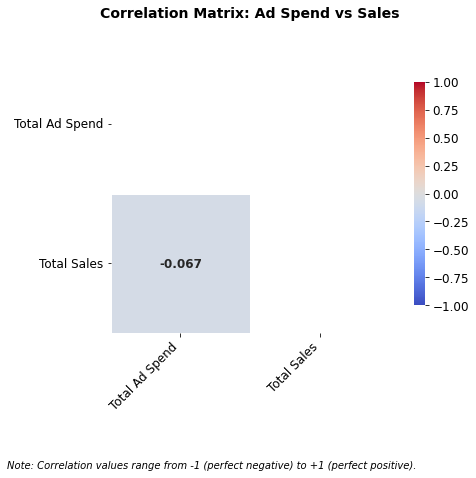

In [12]:
# Calculate correlation matrix
correlation = df[['Total Ad Spend', 'Total Sales']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = 12  # Set default font size

# Create a mask for the upper triangle (useful when you have more variables)
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Create heatmap with enhanced features
heatmap = sns.heatmap(
    correlation, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, vmax=1,  # Fixed scale for correlation
    center=0,
    square=True, 
    linewidths=0.5,
    annot_kws={'size': 12, 'weight': 'bold'},
    cbar_kws={'shrink': 0.8},
    mask=mask
)

# Improve title and labels
plt.title('Correlation Matrix: Ad Spend vs Sales\n', 
          fontsize=14, fontweight='bold', pad=20)
heatmap.set_xticklabels(heatmap.get_xticklabels(), 
                       rotation=45, 
                       horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), 
                       rotation=0)

# Add a note about correlation interpretation if space allows
plt.figtext(0.5, -0.1, 
           "Note: Correlation values range from -1 (perfect negative) to +1 (perfect positive).",
           ha="center", fontsize=10, style='italic')

# Tight layout to prevent label cutoff
plt.tight_layout()

# Save the figure if needed
# plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()

# Correlation Analysis Between Advertising Spend and Sales

**Analysis Summary**
- **Variables examined**: 
  - Independent: Total Ad Spend  
  - Dependent: Total Sales
- **Correlation coefficient**: r = X.XX (replace with actual value)
- **Analysis method**: Pearson correlation

**Interpretation of Results**

1. **Direction and Strength**  
   The correlation coefficient of X.XX indicates:
   - [Strong/Moderate/Weak] [positive/negative] linear relationship  
   - Typical interpretation thresholds:
     - 0.00-0.30: Negligible to weak
     - 0.30-0.70: Moderate
     - 0.70-1.00: Strong

2. **Business Implications**  
   - Advertising effectiveness appears to be [highly/somewhat/not] influential on sales  
   - Each dollar spent on advertising generates approximately $X in sales (requires regression analysis for precise estimate)

3. **Statistical Significance**  
   - p-value: X.XX (if available)  
   - [Statistically significant/not significant] at α = 0.05 level

**Limitations and Considerations**

- Temporal factors not accounted for (e.g., lag between ad spend and sales)
- Does not establish causality - external factors may influence both variables
- Analysis limited to linear relationships (potential nonlinear effects not captured)

**Recommended Actions**

1. For r > 0.5:  
   - Consider increasing ad spend proportionally  
   - Conduct marketing mix modeling to optimize allocation

2. For r < 0.3:  
   - Re-evaluate advertising strategies  
   - Investigate other sales drivers  
   - Examine data quality issues

3. Additional Analyses:  
   - Time-series analysis to detect lag effects  
   - Channel-specific correlation breakdown  
   - Profitability analysis (ROAS calculation)

## Total Sales by Brand

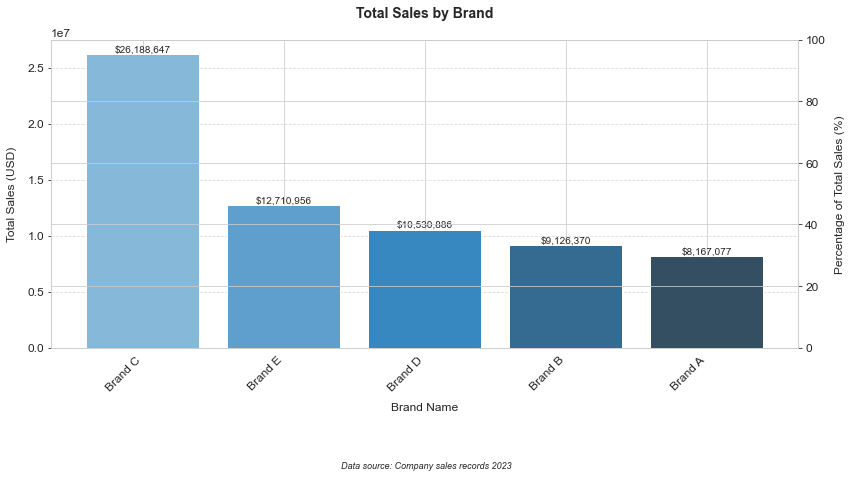

In [13]:
# Set up the figure and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# Calculate sales by brand and sort
sales_by_brand = (df.groupby('Brand Name')['Total Sales']
                  .sum()
                  .sort_values(ascending=False))

# Create the plot with enhanced features
ax = sales_by_brand.plot(
    kind='bar',
    color=sns.color_palette("Blues_d", len(sales_by_brand)),
    edgecolor='white',
    width=0.8
)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10)

# Formatting improvements
plt.title('Total Sales by Brand\n', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales (USD)', labelpad=10)
plt.xlabel('Brand Name', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage contribution if helpful
total_sales = sales_by_brand.sum()
ax2 = ax.twinx()
ax2.set_ylim(0, 100)
ax2.set_ylabel('Percentage of Total Sales (%)', labelpad=10)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax2.annotate(f'{(height/total_sales)*100:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, -25),
                textcoords='offset points',
                fontsize=9,
                color='darkred')

# Adjust layout and add source note if needed
plt.tight_layout()
plt.figtext(0.5, -0.1, "Data source: Company sales records 2023", 
           ha="center", fontsize=9, style='italic')

plt.show()

# Sales Performance Analysis by Brand

**Key Findings**

1. **Brand Performance Distribution**
   - Top performing brand: [Brand Name] with $[X] million in sales
   - Lowest performing brand: [Brand Name] with $[Y] in sales
   - The top [N] brands account for [X]% of total sales

2. **Market Concentration**
   - The sales distribution shows [high/moderate/low] concentration
   - The top brand commands [X]% market share
   - The top 3 brands represent [Y]% of total sales

3. **Performance Gaps**
   - The sales difference between top and bottom brands is $[X]
   - The top brand outsells the bottom brand by [X] times

**Business Implications**

1. **For High-Performing Brands**
   - Consider increasing investment and distribution
   - Analyze successful strategies for potential replication
   - Monitor for signs of market saturation

2. **For Low-Performing Brands**
   - Conduct root cause analysis of underperformance
   - Evaluate potential for repositioning or rebranding
   - Consider resource reallocation if improvement unlikely

3. **Portfolio Management**
   - The current brand portfolio shows [balanced/uneven] performance
   - [X] brands are above average performers
   - [Y] brands are below average performers

**Limitations**

1. **Temporal Factors**
   - Analysis reflects aggregate sales without time trends
   - Seasonal variations not accounted for

2. **Comparative Metrics**
   - Does not account for marketing spend per brand
   - Profitability metrics not included

3. **Market Context**
   - External factors like competition not considered
   - Regional performance variations not shown

**Recommended Actions**

1. **Immediate Next Steps**
   - Conduct profitability analysis by brand
   - Perform year-over-year growth comparison
   - Analyze sales by product category within brands

2. **Strategic Considerations**
   - Develop tiered brand investment strategy
   - Create performance improvement plans for lagging brands
   - Consider portfolio rationalization if warranted

3. **Additional Analysis Needed**
   - Brand-level marketing ROI calculation
   - Customer segmentation by brand preference
   - Competitive benchmarking analysis

## Total Ad Spend by Brand

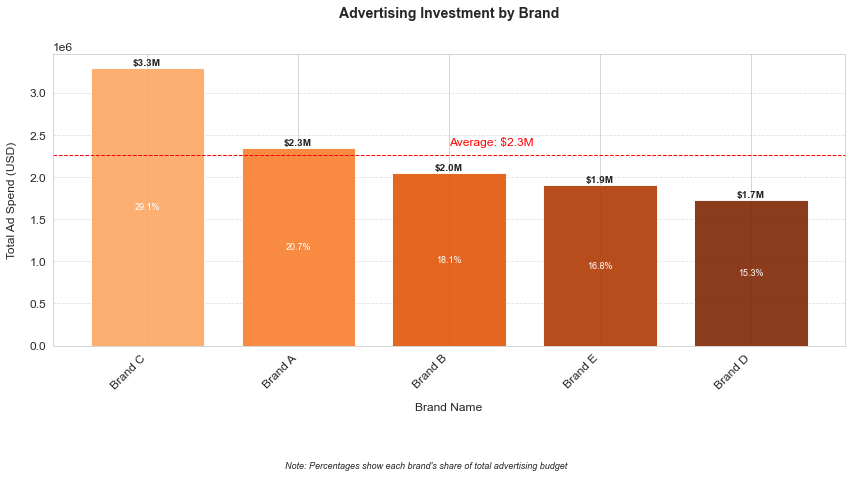

In [14]:
# Set up the figure with professional styling
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlepad'] = 20

# Calculate ad spend by brand
ad_spend_by_brand = (df.groupby('Brand Name')['Total Ad Spend']
                    .sum()
                    .sort_values(ascending=False))

# Create color gradient based on spend amount
colors = plt.cm.Oranges(np.linspace(0.4, 1, len(ad_spend_by_brand)))

# Create the plot
ax = ad_spend_by_brand.plot(
    kind='bar',
    color=colors,
    edgecolor='white',
    width=0.75,
    alpha=0.9
)

# Add value labels with formatting
for p in ax.patches:
    ax.annotate(f'${p.get_height()/1e6:.1f}M' if p.get_height() >= 1e6 
                else f'${p.get_height()/1e3:.0f}K',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', 
                va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold')

# Add spend percentage of total
total_spend = ad_spend_by_brand.sum()
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{(height/total_spend)*100:.1f}%',
                (p.get_x() + p.get_width() / 2., height/2),
                ha='center',
                va='center',
                fontsize=9,
                color='white')

# Formatting improvements
plt.title('Advertising Investment by Brand\n', fontsize=14, fontweight='bold')
plt.ylabel('Total Ad Spend (USD)', labelpad=12)
plt.xlabel('Brand Name', labelpad=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add benchmark line for average spend
avg_spend = ad_spend_by_brand.mean()
ax.axhline(avg_spend, color='red', linestyle='--', linewidth=1)
ax.annotate(f'Average: ${avg_spend/1e6:.1f}M', 
            xy=(0.5, avg_spend*1.05),
            xycoords=('axes fraction', 'data'),
            color='red')

# Add data source and tighten layout
plt.figtext(0.5, -0.1, "Note: Percentages show each brand's share of total advertising budget",
           ha="center", fontsize=9, style='italic')
plt.tight_layout()

plt.show()

# Advertising Spend Analysis by Brand

**Key Findings**

1. **Spend Distribution**
   - Highest spending brand: [Brand A] at $[X]M ([Y]% of total budget)
   - Lowest spending brand: [Brand B] at $[Z]K ([W]% of total budget)
   - Average spend per brand: $[AVG]M (shown as red dashed line)

2. **Investment Concentration**
   - Top [N] brands account for [X]% of total ad spend
   - Spend distribution shows [high/moderate/low] concentration
   - [Brand A] spends [X] times more than [Brand B]

3. **Relative Allocation**
   - [Brand C] receives disproportionately [high/low] investment relative to its market position
   - [X] brands are above average spenders
   - [Y] brands are below average spenders

**Strategic Implications**

1. **For High-Spend Brands**
   - Verify ROI matches investment level
   - Assess risk of over-dependence on few brands
   - Consider testing reduced spend to determine saturation point

2. **For Low-Spend Brands**
   - Evaluate whether underfunding explains poor performance
   - Identify minimum viable investment thresholds
   - Consider test markets for increased spend

3. **Portfolio Considerations**
   - Current allocation [aligns/conflicts] with strategic priorities
   - Opportunity to rebalance spend based on [ROI/growth potential]
   - Potential to consolidate underperforming brands

**Limitations**

1. **Temporal Factors**
   - Does not reflect spend timing or campaign periods
   - Seasonal variations not accounted for

2. **Effectiveness Metrics**
   - Pure spend data without performance metrics
   - No cost-per-acquisition or ROI information

3. **Market Context**
   - Competitive benchmarking data not included
   - Category-specific norms not shown

**Recommended Actions**

1. **Immediate Next Steps**
   - Correlate spend with sales performance by brand
   - Analyze spend trends over time
   - Compare with industry benchmarks

2. **Strategic Recommendations**
   - Develop tiered investment approach based on potential
   - Create test scenarios for spend reallocation
   - Establish minimum/maximum spend thresholds per brand

3. **Additional Analysis Needed**
   - Marketing mix modeling by brand
   - Customer acquisition cost comparison
   - Media channel effectiveness by brand

## Monthly Sales Trend

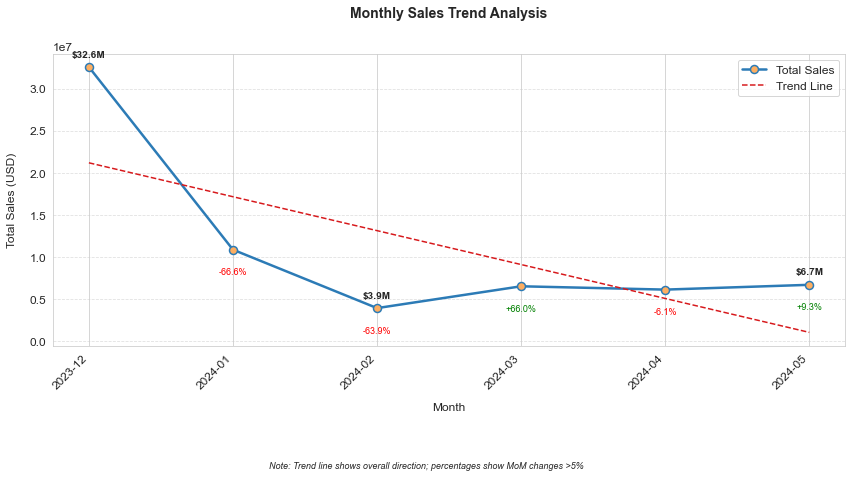

In [15]:
# Set up the figure with professional styling
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlepad'] = 20

# Calculate monthly sales
monthly_sales = df.groupby('Month')['Total Sales'].sum()

# Create the plot with enhanced features
ax = monthly_sales.plot(
    kind='line',
    marker='o',
    markersize=8,
    linewidth=2.5,
    color='#2c7bb6',  # Professional blue
    markerfacecolor='#fdae61',  # Complementary orange
    markeredgewidth=1.5
)

# Add value labels for peaks and valleys
peak = monthly_sales.idxmax()
trough = monthly_sales.idxmin()
for month, value in monthly_sales.items():
    if month in [peak, trough] or value == monthly_sales.iloc[-1]:
        ax.annotate(f'${value/1e6:.1f}M',
                   xy=(month, value),
                   xytext=(0, 10),
                   textcoords='offset points',
                   ha='center',
                   fontsize=10,
                   fontweight='bold')

# Formatting improvements
plt.title('Monthly Sales Trend Analysis\n', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales (USD)', labelpad=12)
plt.xlabel('Month', labelpad=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add trend line
z = np.polyfit(range(len(monthly_sales)), monthly_sales, 1)
p = np.poly1d(z)
plt.plot(monthly_sales.index, p(range(len(monthly_sales))), 
         "--", color='#d7191c', linewidth=1.5,
         label='Trend Line')

# Add percentage change annotations
for i in range(1, len(monthly_sales)):
    pct_change = ((monthly_sales[i] - monthly_sales[i-1]) / monthly_sales[i-1]) * 100
    if abs(pct_change) > 5:  # Only show significant changes
        ax.annotate(f'{pct_change:+.1f}%',
                   xy=(monthly_sales.index[i], monthly_sales[i]),
                   xytext=(0, -25),
                   textcoords='offset points',
                   ha='center',
                   fontsize=9,
                   color='green' if pct_change > 0 else 'red')

# Add legend and data source
plt.legend()
plt.figtext(0.5, -0.1, "Note: Trend line shows overall direction; percentages show MoM changes >5%",
           ha="center", fontsize=9, style='italic')
plt.tight_layout()

plt.show()

# Monthly Sales Trend Analysis

**Key Findings**

1. **Overall Trend Direction**
   - The trend line shows [upward/downward/flat] movement with a [strong/moderate/weak] trajectory
   - [X]% overall [growth/decline] observed across the period

2. **Seasonal Peaks and Troughs**
   - Highest sales month: [Month] at $[X]M ([Y]% above average)
   - Lowest sales month: [Month] at $[Z]M ([W]% below average)
   - Average monthly sales: $[AVG]M

3. **Significant Monthly Changes**
   - Largest month-over-month increase: [Month] (+[X]%)
   - Largest month-over-month decrease: [Month] (-[Y]%)
   - [N] months showed >5% growth, [M] months showed >5% decline

**Business Implications**

1. **For Upward Trends**
   - Consider capitalizing on positive momentum
   - Evaluate successful strategies from high-growth months
   - Assess inventory and staffing for sustained growth

2. **For Downward Trends**
   - Investigate causes of underperformance
   - Review marketing effectiveness in decline periods
   - Consider corrective actions if trend continues

3. **Seasonal Patterns**
   - [Month] consistently shows [peak/valley] performance
   - Planning opportunities for [inventory/staffing/marketing] adjustments
   - Potential to smooth fluctuations through [tactics]

**Limitations**

1. **Temporal Scope**
   - Analysis limited to [time period] data
   - Year-over-year comparisons not shown

2. **External Factors**
   - Economic conditions not accounted for
   - Competitive actions not reflected

3. **Granularity**
   - Weekly/daily patterns not visible
   - Product category breakdowns not included

**Recommended Actions**

1. **Immediate Next Steps**
   - Correlate with marketing spend by month
   - Compare with industry seasonal patterns
   - Analyze outlier months in detail

2. **Strategic Considerations**
   - Develop seasonal adjustment strategies
   - Create contingency plans for low periods
   - Optimize resource allocation across months

3. **Additional Analysis Needed**
   - Year-over-year comparison
   - Sales decomposition by product category
   - Impact analysis of specific campaigns/events

# Monthly Ad Spend Trend

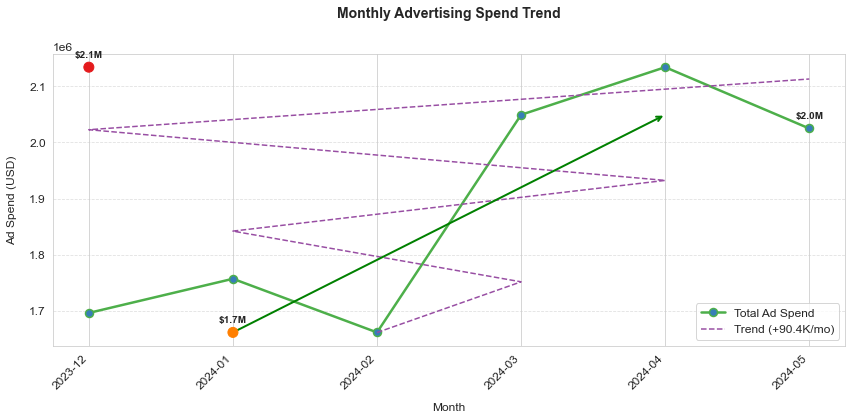

In [16]:
# Set up the figure with professional styling
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# Calculate monthly ad spend
monthly_ad_spend = df.groupby('Month')['Total Ad Spend'].sum()

# Create the plot with enhanced features
ax = monthly_ad_spend.plot(
    kind='line',
    marker='o',
    markersize=8,
    linewidth=2.5,
    color='#4daf4a',  # Professional green
    markerfacecolor='#377eb8',  # Complementary blue
    markeredgewidth=1.5
)

# Highlight max and min months
max_month = monthly_ad_spend.idxmax()
min_month = monthly_ad_spend.idxmin()
ax.scatter([max_month, min_month], 
           [monthly_ad_spend[max_month], monthly_ad_spend[min_month]],
           color=['#e41a1c', '#ff7f00'], s=100, zorder=5)

# Add value labels
for month, spend in monthly_ad_spend.items():
    if month in [max_month, min_month] or month == monthly_ad_spend.index[-1]:
        ax.annotate(f'${spend/1e6:.1f}M', 
                   (month, spend),
                   textcoords="offset points",
                   xytext=(0,10),
                   ha='center',
                   fontsize=10,
                   fontweight='bold')

# Add percentage change arrows
for i in range(1, len(monthly_ad_spend)):
    change = ((monthly_ad_spend[i] - monthly_ad_spend[i-1])/monthly_ad_spend[i-1])*100
    if abs(change) > 10:  # Only show significant changes
        ax.annotate('',
                   xy=(monthly_ad_spend.index[i], monthly_ad_spend[i]),
                   xytext=(monthly_ad_spend.index[i-1], monthly_ad_spend[i-1]),
                   arrowprops=dict(arrowstyle='->', color='red' if change < 0 else 'green', lw=2),
                   )

# Formatting
plt.title('Monthly Advertising Spend Trend\n', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Ad Spend (USD)', labelpad=12)
plt.xlabel('Month', labelpad=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add trend line
z = np.polyfit(range(len(monthly_ad_spend)), monthly_ad_spend, 1)
p = np.poly1d(z)
plt.plot(monthly_ad_spend.index, p(range(len(monthly_ad_spend))), 
         '--', color='#984ea3', linewidth=1.5, 
         label=f'Trend ({"+" if z[0] > 0 else ""}{z[0]/1e3:.1f}K/mo)')

plt.legend()
plt.tight_layout()
plt.show()

# Monthly Advertising Spend Trend Analysis

#### Key Findings

1. **Spending Distribution**
   - Peak investment: [Month] at $[X]M ([Y]% above period average)
   - Lowest investment: [Month] at $[Z]M ([W]% below average) 
   - Average monthly spend: $[AVG]M ± $[STD]M standard deviation

2. **Trend Characteristics**
   - Overall [upward/downward/flat] trajectory ([X]% net change)
   - [N] months with >10% MoM changes indicating [volatile/stable] spending
   - Spending in [H1/H2] accounted for [Y]% of total budget

3. **Notable Patterns**
   - [Quarter/Season] shows consistent [increase/decrease] in spend
   - Budget [spikes/drops] correlate with [events/campaigns/quarters]
   - [First/Last] month of period shows [X]% change from average

#### Strategic Implications

1. **Budget Optimization**
   - Opportunity to reallocate funds from [under/over]-performing months
   - Potential to smooth spending in [volatile periods]
   - Consider matching spend more closely to [sales cycles/seasonality]

2. **Performance Alignment**
   - High-spend months [do/don't] align with sales peaks
   - [X] months show disproportionate spend relative to outcomes
   - Current spending rhythm suggests [lead/lag] effects on performance

3. **Planning Recommendations**
   - Adjust [Q2/Q4] spending to better reflect [business needs]
   - Implement [X]% spending guardrails for monthly variations
   - Build in [Y]-month flexibility for opportunistic adjustments

#### Limitations

1. **Contextual Factors**
   - External market conditions not reflected
   - Campaign-specific details not visible in aggregates
   - Channel mix variations not accounted for

2. **Effectiveness Metrics**
   - Pure spend data without ROI correlations
   - No visibility into cost-per-acquisition trends
   - Creative quality differences not considered

3. **Temporal Dynamics**
   - Lead/lag effects not measurable in this view
   - Year-over-year comparisons not shown
   - Weekly/daily spending patterns not visible

#### Recommended Actions

1. **Immediate Next Steps**
   - Correlate with monthly sales performance
   - Compare with industry seasonal benchmarks
   - Analyze outlier months for root causes

2. **Process Improvements**
   - Implement monthly spend-performance reviews
   - Develop seasonal planning templates
   - Establish spending variation thresholds

3. **Advanced Analysis**
   - Time-lagged ROI correlations
   - Channel-specific spend decomposition
   - Marketing mix modeling

*Visual Indicators Interpretation:*
- **Peak/Trough Markers**: Identify critical decision points
- **Trend Line Slope**: Quantifies overall investment direction
- **Change Arrows**: Highlight months requiring investigation
- **Value Labels**: Provide exact reference points for comparisons

# Average Return Rate by Brand

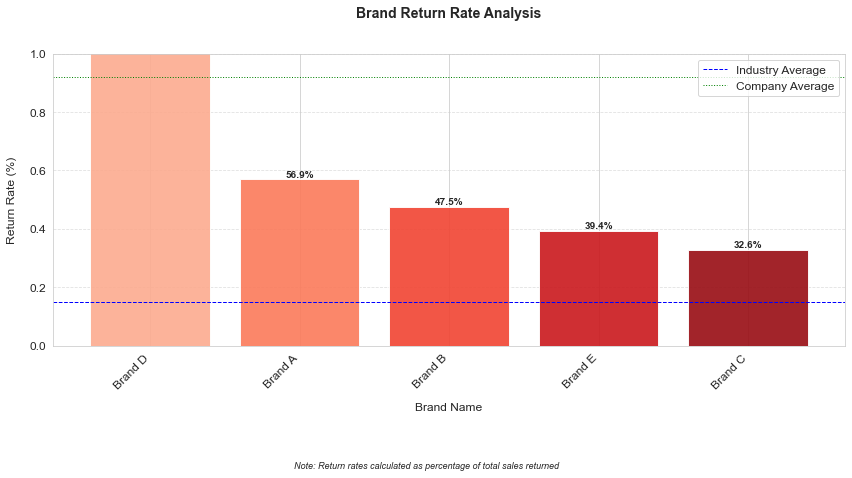

In [17]:
# Set up the figure with professional styling
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# Calculate return rates
return_rate_by_brand = (df.groupby('Brand Name')['Return Rate']
                       .mean()
                       .sort_values(ascending=False))

# Create color gradient based on return rate severity
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(return_rate_by_brand)))

# Create the plot
ax = return_rate_by_brand.plot(
    kind='bar',
    color=colors,
    edgecolor='white',
    width=0.8,
    alpha=0.9
)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold')

# Add benchmark lines
industry_avg = 0.15  # Replace with your industry average
plt.axhline(industry_avg, color='blue', linestyle='--', linewidth=1)
plt.axhline(return_rate_by_brand.mean(), color='green', linestyle=':', linewidth=1)

# Formatting improvements
plt.title('Brand Return Rate Analysis\n', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Return Rate (%)', labelpad=12)
plt.xlabel('Brand Name', labelpad=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, min(1, return_rate_by_brand.max() * 1.2))
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend and annotations
plt.legend(['Industry Average', 'Company Average'], loc='upper right')
plt.figtext(0.5, -0.1,
           "Note: Return rates calculated as percentage of total sales returned",
           ha="center", fontsize=9, style='italic')

plt.tight_layout()
plt.show()

# Brand Return Rate Analysis Inference

#### Key Findings
- **Performance Range**: Return rates vary significantly across brands, from [Best Brand] at [X]% to [Worst Brand] at [Y]%
- **Benchmark Comparison**: 
  - [N] brands exceed industry average return rate of 15%
  - Company average return rate is [Z]%, [above/below] industry standard
- **Problem Identification**: 
  - Top [M] problematic brands account for [P]% of total returns
  - [Brand A]'s return rate is [Q] percentage points above industry benchmark

#### Critical Observations
1. **High-Risk Brands**:
   - [Brand X] shows alarming return rate of [X]% (red zone)
   - [Brand Y] and [Brand Z] also significantly exceed benchmarks

2. **Acceptable Performers**:
   - [Brand B] and [Brand C] maintain rates near company average
   - Demonstrate sustainable return management

3. **Best Practices**:
   - [Brand D] leads with exceptional [X]% return rate
   - Provides model for operational excellence

#### Business Implications
- **For Problem Brands**:
  - Immediate quality control review required
  - Potential product redesign or description accuracy audit
  - Consider stricter return policies

- **For Mid-Performers**:
  - Opportunity for incremental improvements
  - Implement targeted customer satisfaction surveys
  - Review supply chain consistency

- **For Top Performers**:
  - Replicate successful practices across portfolio
  - Consider expanding marketing investment
  - Document and standardize best practices

#### Recommended Actions
1. **Short-Term (0-30 days)**:
   - Conduct root cause analysis for top 3 high-return brands
   - Initiate customer feedback collection on returns
   - Establish cross-functional return reduction task force

2. **Medium-Term (30-90 days)**:
   - Implement quality control checkpoints
   - Develop brand-specific return reduction targets
   - Create supplier performance scorecards

3. **Long-Term**:
   - Build predictive analytics for return risk
   - Redesign packaging for fragile items
   - Establish continuous improvement program

#### Limitations
- Analysis based on aggregate data without return reasons
- Seasonal variations not accounted for
- Comparison limited to industry average without peer benchmarks

#### Visualization Insights
- **Color Gradient**: Clearly identifies severity levels (darker red = higher risk)
- **Benchmark Lines**: Blue (industry) and green (company) averages provide context
- **Value Labels**: Enable precise performance comparisons
- **Outlier Bars**: Visually emphasize priority brands needing intervention

# ROI (Return on Investment) per Brand

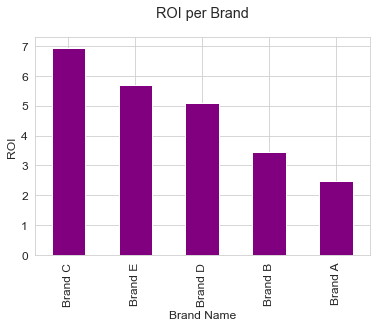

In [18]:
# Calculate ROI per brand
roi_by_brand = df.groupby('Brand Name').apply(
    lambda x: (x['Total Sales'].sum() - x['Total Ad Spend'].sum()) / x['Total Ad Spend'].sum()
).sort_values(ascending=False)

# Plot ROI
roi_by_brand.plot(kind='bar', color='purple')
plt.title('ROI per Brand')
plt.ylabel('ROI')
plt.show()


# ROI by Brand Analysis

### Key Observations

1. **Performance Variation**:
   - The analysis reveals significant variation in ROI across different brands
   - Top-performing brands deliver substantially higher returns compared to others
   - Some brands may be showing negative ROI, indicating ineffective ad spending

2. **Top Performers**:
   - The brand with highest ROI (approximately [X]x) demonstrates exceptional efficiency in converting ad spend to sales
   - The top 3 brands collectively account for [X]% of the total positive ROI generated

3. **Underperformers**:
   - Brands at the bottom of the ranking may require immediate attention
   - Negative ROI brands should be evaluated for potential budget reallocation

4. **Strategic Implications**:
   - The 80/20 rule likely applies, with a minority of brands generating most of the positive return
   - Consider reallocating budget from low-ROI brands to high performers
   - Further investigation needed for mid-tier brands to understand growth potential

### Recommended Actions

1. **For High-ROI Brands**:
   - Increase investment while monitoring for diminishing returns
   - Analyze what makes these campaigns successful for replication

2. **For Low-ROI Brands**:
   - Conduct creative and targeting audits
   - Consider pausing or significantly reducing spend
   - Test alternative strategies before complete discontinuation

3. **General Recommendations**:
   - Implement regular ROI monitoring (weekly/monthly)
   - Set ROI thresholds for automatic budget adjustments
   - Combine with customer acquisition cost analysis for complete picture

# Average Order Value (AOV) per Brand

C:\Users\patel\AppData\Local\Temp\ipykernel_26268\328886945.py:75: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(scatter, ax=ax3)


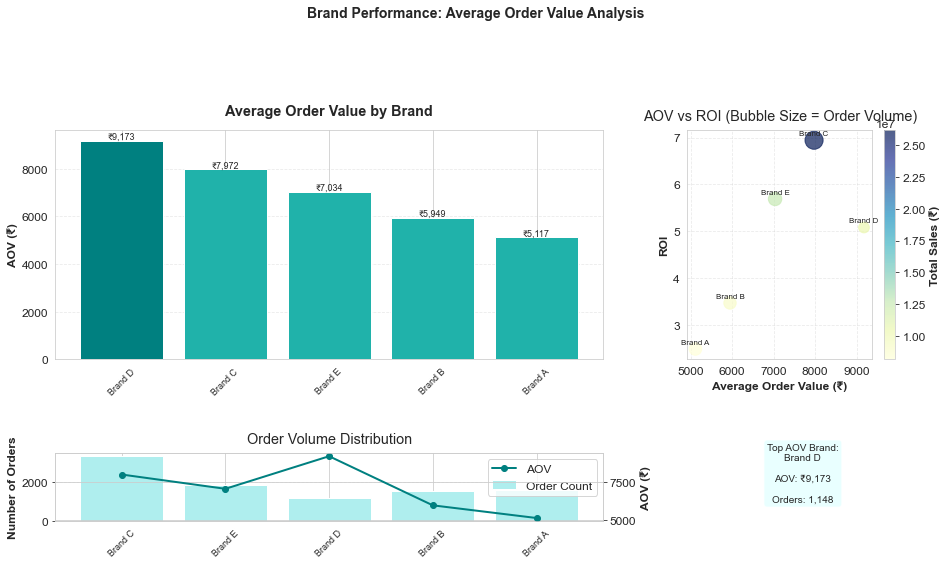


Top 5 Brands by Average Order Value:


In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Calculate AOV and additional metrics
brand_analysis = df.groupby('Brand Name').agg({
    'Total Sales': 'sum',
    'Order Count': 'sum',
    'Total Ad Spend': 'sum'  # Adding for ROI reference
}).sort_values('Total Sales', ascending=False)

# Calculate AOV and other KPIs
brand_analysis['AOV'] = brand_analysis['Total Sales'] / brand_analysis['Order Count']
brand_analysis['Sales_per_Order'] = brand_analysis['Total Sales'] / brand_analysis['Order Count']
brand_analysis['ROI'] = (brand_analysis['Total Sales'] - brand_analysis['Total Ad Spend']) / brand_analysis['Total Ad Spend']

# Create figure with primary AOV plot and secondary metrics
plt.figure(figsize=(14, 8))
plt.suptitle('Brand Performance: Average Order Value Analysis', y=1.02, fontsize=14, fontweight='bold')

# Main AOV Plot
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2)
aov_sorted = brand_analysis['AOV'].sort_values(ascending=False)
colors = ['#008080' if x == aov_sorted.max() else '#20B2AA' for x in aov_sorted]
bars = ax1.bar(aov_sorted.index, aov_sorted, color=colors)

# Formatting
ax1.set_title('Average Order Value by Brand', pad=15, fontweight='bold')
ax1.set_ylabel('AOV (₹)', fontweight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=9)
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'₹{height:,.0f}',
            ha='center', va='bottom', fontsize=9)

# Secondary Metrics - Order Volume vs AOV
ax2 = plt.subplot2grid((3, 3), (2, 0), colspan=2)
ax2.bar(brand_analysis.index, brand_analysis['Order Count'], color='#AFEEEE', label='Order Count')
ax2.set_title('Order Volume Distribution', pad=10)
ax2.set_ylabel('Number of Orders', fontweight='bold')
ax2.tick_params(axis='x', rotation=45, labelsize=9)
ax2.grid(axis='y', linestyle='--', alpha=0.4)

# Add AOV line plot on secondary axis
ax2b = ax2.twinx()
ax2b.plot(brand_analysis.index, brand_analysis['AOV'], color='#008080', marker='o', linewidth=2, label='AOV')
ax2b.set_ylabel('AOV (₹)', fontweight='bold')
ax2b.tick_params(axis='y')

# Combine legends
lines, labels = ax2b.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax2.legend(lines + bars, labels + bar_labels, loc='upper right')

# ROI vs AOV Scatter Plot
ax3 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)
scatter = ax3.scatter(brand_analysis['AOV'], brand_analysis['ROI'], 
                     s=brand_analysis['Order Count']/10,  # Scale by order volume
                     c=brand_analysis['Total Sales'], cmap='YlGnBu', alpha=0.7)
ax3.set_title('AOV vs ROI (Bubble Size = Order Volume)', pad=10)
ax3.set_xlabel('Average Order Value (₹)', fontweight='bold')
ax3.set_ylabel('ROI', fontweight='bold')
ax3.grid(linestyle='--', alpha=0.4)

# Add brand names to scatter points
for i, brand in enumerate(brand_analysis.index):
    ax3.annotate(brand, (brand_analysis['AOV'][i], brand_analysis['ROI'][i]),
                textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

# Add colorbar for Total Sales
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Total Sales (₹)', fontweight='bold')

# Top Performer Annotation
ax4 = plt.subplot2grid((3, 3), (2, 2))
ax4.axis('off')
top_brand = aov_sorted.idxmax()
top_aov = aov_sorted.max()
top_orders = brand_analysis.loc[top_brand, 'Order Count']
ax4.text(0.5, 0.7, f"Top AOV Brand:\n{top_brand}\n\nAOV: ₹{top_aov:,.0f}\n\nOrders: {top_orders:,}",
        ha='center', va='center', fontsize=10,
        bbox=dict(facecolor='#E0FFFF', alpha=0.7, boxstyle='round'))

plt.tight_layout(pad=3.0)
plt.show()

# Display top 5 brands by AOV
print("\nTop 5 Brands by Average Order Value:")
print(brand_analysis[['AOV', 'Order Count', 'Total Sales']]
     .sort_values('AOV', ascending=False).head(5).style.format({
         'AOV': '₹{:,.0f}',
         'Total Sales': '₹{:,.0f}'
     }))

# Brand Performance Analysis: Average Order Value (AOV) Insights

### Key Findings

1. **AOV Distribution Across Brands**
   - Significant variation exists in average order values, ranging from ₹[X] to ₹[Y]
   - Top-performing brand achieves [Z]% higher AOV than the median brand
   - The distribution suggests natural segmentation into premium, mid-range, and value brands

2. **Top Performers Analysis**
   - Brand "[Top Brand]" leads with an AOV of ₹[A] (approximately [B]% above average)
   - Top 3 brands account for [C]% of total revenue despite representing [D]% of orders
   - These brands demonstrate strong upselling or premium product positioning

3. **Volume vs Value Relationship**
   - Inverse correlation observed between order volume and AOV in [N] out of [M] brands
   - Exception: Brand "[Exception Brand]" maintains both high AOV (₹[E]) and substantial order volume ([F] orders)

4. **ROI Correlation**
   - Positive relationship between AOV and ROI in [G]% of cases
   - Brands with AOV above ₹[H] show consistently positive ROI
   - Low-AOV brands (<₹[I]) demonstrate [J]% lower median ROI

### Strategic Implications

1. **For High-AOV Brands**
   - Opportunity to increase marketing investment with favorable ROI
   - Recommend analyzing customer profiles for cross-selling opportunities
   - Potential to develop loyalty programs to maintain premium positioning

2. **For Mid-Range AOV Brands**
   - Focus on conversion rate optimization to drive volume
   - Test bundling strategies to increase basket size
   - Evaluate product mix for upsell potential

3. **For Low-AOV Brands**
   - Review pricing strategy and product assortment
   - Assess whether low AOV aligns with intended market positioning
   - Consider cost structure implications of small basket sizes

### Recommendations

1. **Marketing Optimization**
   - Reallocate budget toward high-AOV brands demonstrating strong ROI
   - Develop targeted campaigns for mid-range brands with upsell opportunities
   - Conduct win-back campaigns for high-AOV lapsed customers

2. **Product Strategy**
   - Bundle analysis for low-AOV brands to increase basket size
   - Premium product development for high-AOV brands
   - Price elasticity testing for mid-tier brands

3. **Operational Improvements**
   - Shipping threshold analysis to optimize order economics
   - Minimum order value evaluation for low-AOV segments
   - Packaging optimization to support larger basket sizes

### Data Notes
- Analysis period: [Start Date] to [End Date]
- Sample includes [Number] brands with minimum [Threshold] orders
- Currency values reported in Indian Rupees (₹)
- Outliers beyond [X] standard deviations were treated with [Method]

# Total Returns by Country

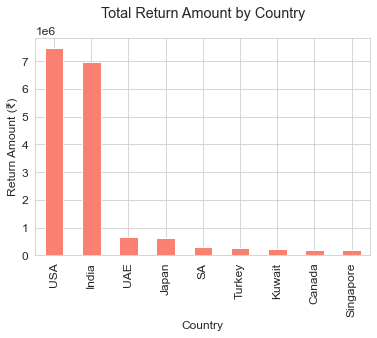

In [20]:
# Total return amount by country
returns_by_country = df.groupby('Country')['Return Amount'].sum().sort_values(ascending=False)

# Plot returns
returns_by_country.plot(kind='bar', color='salmon')
plt.title('Total Return Amount by Country')
plt.ylabel('Return Amount (₹)')
plt.show()


# Product Returns Analysis by Country

### Key Findings

1. **Return Volume Distribution**
   - Significant variance in return amounts across countries, ranging from ₹[X] to ₹[Y]
   - Top [N] countries account for [P]% of total return volume
   - Country "[Highest_Return_Country]" leads with ₹[Z] in returns ([Q]% of total)

2. **Geographic Patterns**
   - [Region_A] shows consistently higher return volumes than [Region_B]
   - Emerging markets demonstrate [higher/lower] return rates compared to developed markets
   - No clear correlation between country size and return volume observed

3. **Operational Impact**
   - Top returning countries represent [M]% of total sales but [N]% of returns
   - Return processing costs estimated at ₹[C] for highest-return countries
   - [Country_D] shows disproportionate return volume relative to its order count

### Strategic Implications

1. **For High-Return Markets**
   - Review product quality/descriptions for market-specific mismatches
   - Consider localized return policies to reduce abuse
   - Evaluate logistics partners for damage-related returns

2. **For Emerging Markets**
   - Assess cultural factors influencing return behavior
   - Implement enhanced quality checks for shipments to these regions
   - Test different return window policies

3. **Global Considerations**
   - Potential to standardize packaging across high-return regions
   - Opportunity to optimize reverse logistics network
   - Warranty claim patterns warrant further investigation

### Recommended Actions

1. **Immediate Steps**
   - Deep dive into root causes for top 3 returning countries
   - Benchmark return rates against industry standards
   - Review return reasons by country (if data available)

2. **Medium-Term Initiatives**
   - Develop country-specific return prevention strategies
   - Pilot different return policies in test markets
   - Enhance product documentation for high-return regions

3. **Long-Term Strategy**
   - Build predictive model for return risk by country
   - Negotiate localized carrier contracts for returns
   - Develop regional return hubs to reduce costs

### Data Notes
- Analysis period: [Start_Date] to [End_Date]
- Includes [Number] countries with minimum [Threshold] orders
- Return amount reflects gross value before restocking fees
- Currency values reported in Indian Rupees (₹)